1. Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sas 

import warnings
warnings.filterwarnings('ignore')

2. Read the file

In [4]:
pd.read_csv(r"C:\Users\HP\Desktop\DA (Python)\Notes Provided by Sumit sir\Pune_Coffe shop data analysis 1.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HP\\Desktop\\DA (Python)\\Notes Provided by Sumit sir\\Pune_Coffe shop data analysis 1.csv'


3. Check Null Values

In [3]:
cafe.isnull().sum()

transaction_id        0
transaction_date      0
transaction_time      5
transaction_qty      12
store_id              0
store_location       63
product_id            6
unit_price            0
Unit_Making_Price     0
product_category     14
product_type         11
product_detail       21
dtype: int64

4. Fill null values

In [4]:
cafe.dtypes

transaction_id         int64
transaction_date      object
transaction_time      object
transaction_qty      float64
store_id               int64
store_location        object
product_id           float64
unit_price           float64
Unit_Making_Price    float64
product_category      object
product_type          object
product_detail        object
dtype: object

In [5]:
def my_fill_na_function(cafe):
     
     for i in cafe.columns:
        
        if cafe[i].dtypes in['int64','int32','float64','float32']:
            cafe[i].fillna(cafe[i].mean(),inplace=True)
        elif cafe[i].dtypes in['str64','str32','object']:  
            cafe[i].fillna(cafe[i].mode()[0],inplace = True)

my_fill_na_function(cafe)           

In [6]:
cafe.isnull().sum()

transaction_id       0
transaction_date     0
transaction_time     0
transaction_qty      0
store_id             0
store_location       0
product_id           0
unit_price           0
Unit_Making_Price    0
product_category     0
product_type         0
product_detail       0
dtype: int64

5. Statistics information about the data

In [7]:
cafe.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price,Unit_Making_Price
count,46308.000000,46308.000000,46308.000000,46308.000000,46308.000000,46308.000000
mean,23154.486028,1.438893,5.280988,47.902121,9.430382,4.243672
std,13368.088321,0.541199,2.100390,17.926753,3.451129,1.553008
min,1.000000,1.000000,3.000000,1.000000,2.400000,1.080000
25%,11577.750000,1.000000,3.000000,33.000000,7.500000,3.375000
50%,23154.500000,1.000000,5.000000,47.000000,9.000000,4.050000
75%,34731.250000,2.000000,8.000000,60.000000,11.250000,5.062500
max,46299.000000,8.000000,8.000000,87.000000,45.000000,20.250000


6. Total rows of the data 

In [8]:
cafe.shape[0]

46308

#Drop Duplicates

In [9]:
cafe.duplicated().sum()

9

In [10]:
cafe.drop_duplicates(inplace = True)
cafe.duplicated().sum()

0

In [11]:
cafe.shape

(46299, 12)

#Drop Columns

In [12]:
cafe.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'Unit_Making_Price', 'product_category', 'product_type',
       'product_detail'],
      dtype='object')

In [13]:
cafe.drop(columns = ['transaction_id','store_id','product_id'], inplace = True)

In [14]:
cafe.head(1)

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,Unit_Making_Price,product_category,product_type,product_detail
0,17-10-2023,08:21:55,1.0,Viman Nagar,9.0,4.05,Coffee,Barista Espresso,Espresso shot


#Create month name, Year, day name columns

In [15]:
cafe["transaction_date"] = pd.to_datetime(cafe["transaction_date"])
cafe.dtypes

transaction_date     datetime64[ns]
transaction_time             object
transaction_qty             float64
store_location               object
unit_price                  float64
Unit_Making_Price           float64
product_category             object
product_type                 object
product_detail               object
dtype: object

In [16]:
cafe["Day_Name"] = cafe["transaction_date"].dt.day_name()
cafe["Month_Name"] = cafe["transaction_date"].dt.month_name()
cafe["Year"] = cafe["transaction_date"].dt.year

In [17]:
cafe.head(1)

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,Unit_Making_Price,product_category,product_type,product_detail,Day_Name,Month_Name,Year
0,2023-10-17,08:21:55,1.0,Viman Nagar,9.0,4.05,Coffee,Barista Espresso,Espresso shot,Tuesday,October,2023


#Add Columns

In [18]:
cafe["Total_Income"] = cafe["unit_price"]*cafe["transaction_qty"]

In [19]:
cafe["Profit"] = cafe["Total_Income"] - (cafe["Unit_Making_Price"] * cafe["transaction_qty"])

In [20]:
cafe

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,Unit_Making_Price,product_category,product_type,product_detail,Day_Name,Month_Name,Year,Total_Income,Profit
0,2023-10-17,08:21:55,1.0,Viman Nagar,9.00,4.0500,Coffee,Barista Espresso,Espresso shot,Tuesday,October,2023,9.00,4.9500
1,2024-11-12,09:55:00,1.0,Viman Nagar,9.75,4.3875,Bakery,Scone,Ginger Scone,Tuesday,November,2024,9.75,5.3625
2,2023-12-23,09:33:27,2.0,Viman Nagar,2.40,1.0800,Flavours,Regular syrup,Hazelnut syrup,Saturday,December,2023,4.80,2.6400
3,2023-07-28,10:31:46,2.0,Viman Nagar,12.75,5.7375,Coffee,Barista Espresso,Latte Rg,Friday,July,2023,25.50,14.0250
4,2024-08-24,09:42:51,1.0,Viman Nagar,7.50,3.3750,Tea,Brewed Black tea,Earl Grey Rg,Saturday,August,2024,7.50,4.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46294,2023-10-25,09:41:04,1.0,Karave Nagar,13.50,6.0750,Bakery,Scone,Scottish Cream Scone,Wednesday,October,2023,13.50,7.4250
46295,2024-11-06,09:04:51,1.0,Shivaji Nagar,10.50,4.7250,Coffee,Organic brewed coffee,Brazilian Lg,Wednesday,November,2024,10.50,5.7750
46296,2024-07-06,18:51:32,1.0,Viman Nagar,14.25,6.4125,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,Saturday,July,2024,14.25,7.8375
46297,2023-08-27,15:27:50,2.0,Karave Nagar,10.50,4.7250,Coffee,Gourmet brewed coffee,Ethiopia Lg,Sunday,August,2023,21.00,11.5500


7. Month wise total sale analysis

<Axes: title={'center': 'Month wise total sale analysis'}, xlabel='Month_Name', ylabel='Profit'>

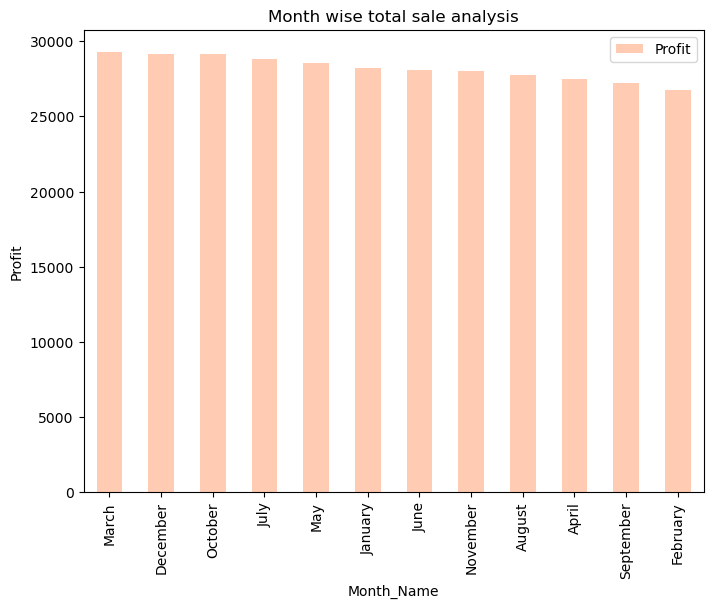

In [47]:
cafe.groupby(by = ["Month_Name"])["Profit"].sum().sort_values(ascending = False).plot(kind='bar', legend=True, title="Month wise total sale analysis", ylabel='Profit', xlabel='Month_Name', figsize = (8,6), color="#ffccb3")

8. Day wise total sell analysis

<Axes: title={'center': 'Day wise total sell analysis'}, ylabel=' '>

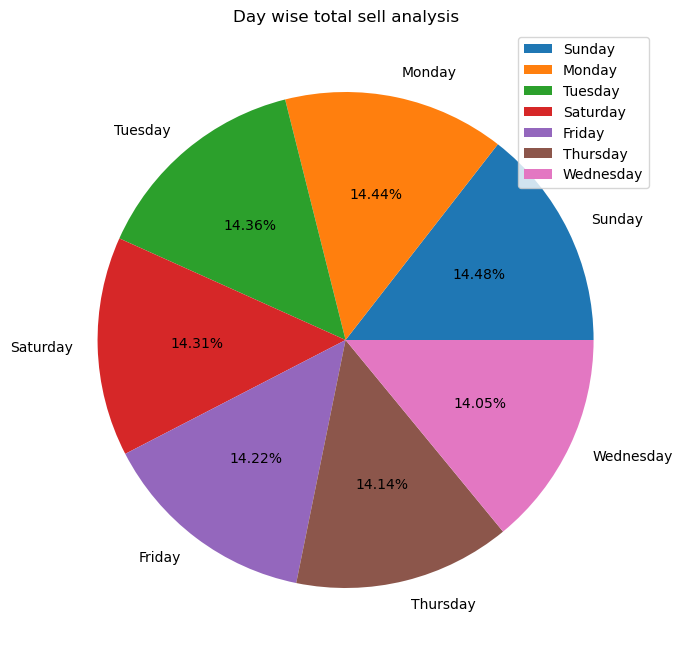

In [58]:
cafe.groupby(by = ["Day_Name"])["Profit"].sum().sort_values(ascending = False).plot(kind='pie', autopct='%1.2f%%', legend=True, title="Day wise total sell analysis", ylabel= " ", figsize = (8,12))

9. Highest quantity sold Store Location

<Axes: title={'center': 'Day wise total sell analysis'}, xlabel='store_location', ylabel='transaction_qty'>

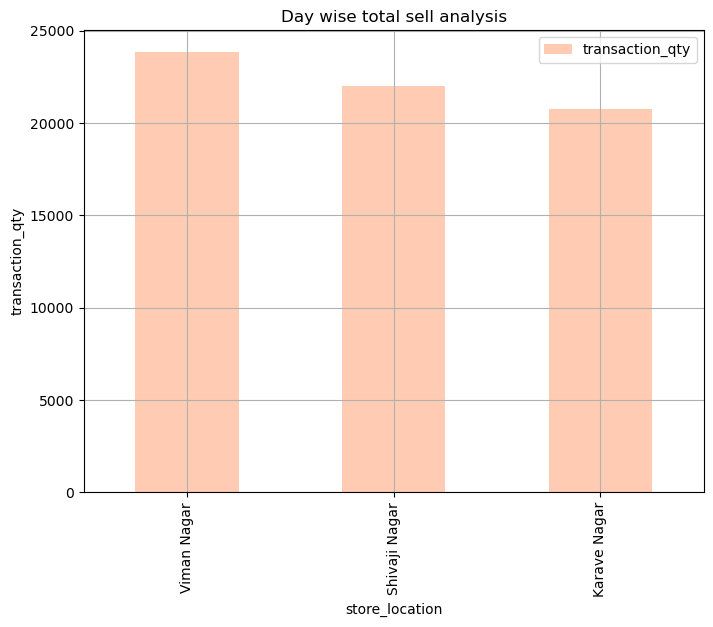

In [72]:
cafe.groupby(by = ["store_location"])["transaction_qty"].sum().sort_values(ascending = False).plot(kind='bar', legend=True, title="Day wise total sell analysis", grid=True, xlabel='store_location', ylabel='transaction_qty', figsize = (8,6), color="#ffccb3")

10. Location wise total price analysis

<Axes: title={'center': 'Location wise total price analysis'}, xlabel='store_location', ylabel='Total_Income'>

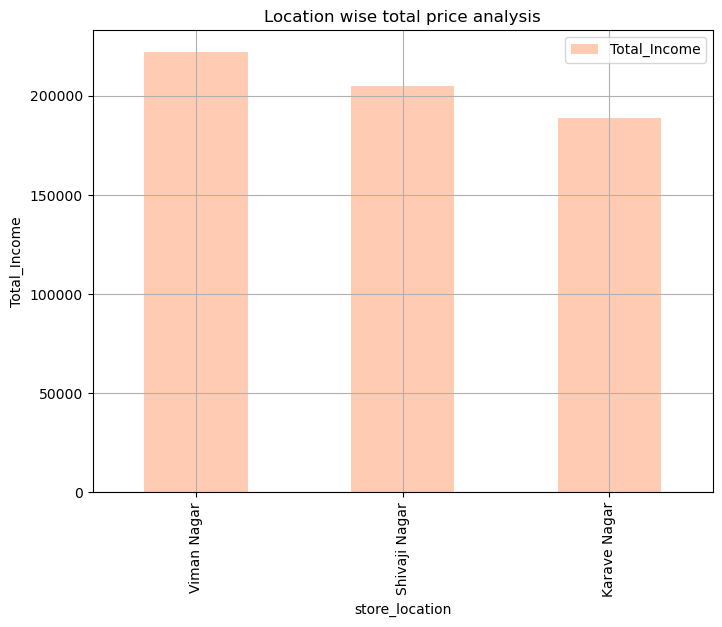

In [74]:
cafe.groupby(by = ["store_location"])["Total_Income"].sum().sort_values(ascending = False).plot(kind='bar', legend=True, title="Location wise total price analysis", grid=True, xlabel='store_location', ylabel='Total_Income', figsize = (8,6), color="#ffccb3")

11. Category wise total price

<Axes: title={'center': 'Category wise total price analysis'}, xlabel='product_category', ylabel='Total_Income'>

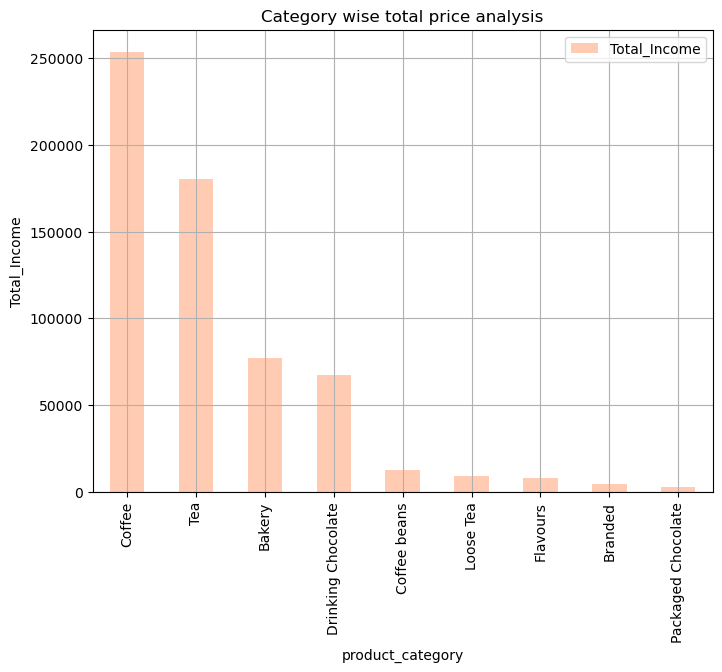

In [75]:
cafe.groupby(by = ["product_category"])["Total_Income"].sum().sort_values(ascending = False).plot(kind='bar', legend=True, title="Category wise total price analysis", grid=True, xlabel='product_category', ylabel='Total_Income', figsize = (8,6), color="#ffccb3")

12. Top 6 product types based on total price

<Axes: title={'center': 'product types based on total price analysis'}, xlabel='product_type', ylabel='Total_Income'>

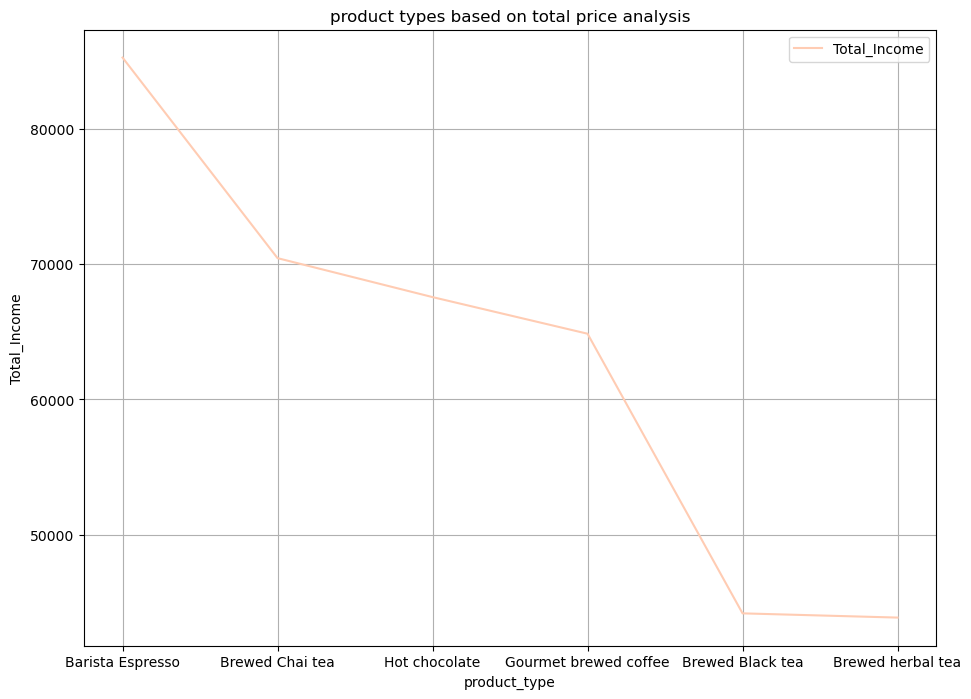

In [87]:
cafe.groupby(by = ["product_type"])["Total_Income"].sum().sort_values(ascending = False).nlargest(6).plot(kind='line', legend=True, title="product types based on total price analysis", grid=True, xlabel='product_type', ylabel='Total_Income', figsize = (11,8), color="#ffccb3")

In [88]:
cafe.columns

Index(['transaction_date', 'transaction_time', 'transaction_qty',
       'store_location', 'unit_price', 'Unit_Making_Price', 'product_category',
       'product_type', 'product_detail', 'Day_Name', 'Month_Name', 'Year',
       'Total_Income', 'Profit'],
      dtype='object')

13. Store location products category wise total price

<Axes: title={'center': 'product types based on total price analysis'}, xlabel='product_type', ylabel='Total_Income'>

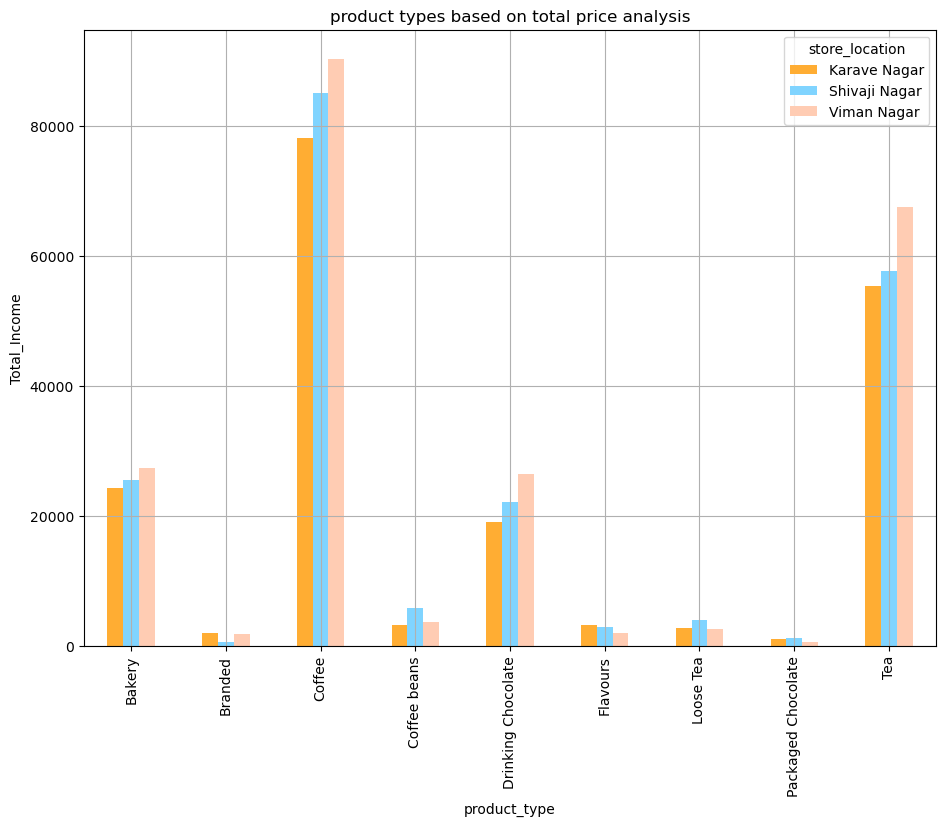

In [93]:
cafe.pivot_table(columns="store_location", index="product_category", values="Total_Income", aggfunc="sum").plot(kind='bar', legend=True, title="product types based on total price analysis", grid=True, xlabel='product_type', ylabel='Total_Income', figsize = (11,8), color=["#ffad33", "#80d4ff", "#ffccb3"])

14. Top 3 products category

<Axes: title={'center': 'product types based on total price analysis'}, xlabel='product_type', ylabel='Total_Income'>

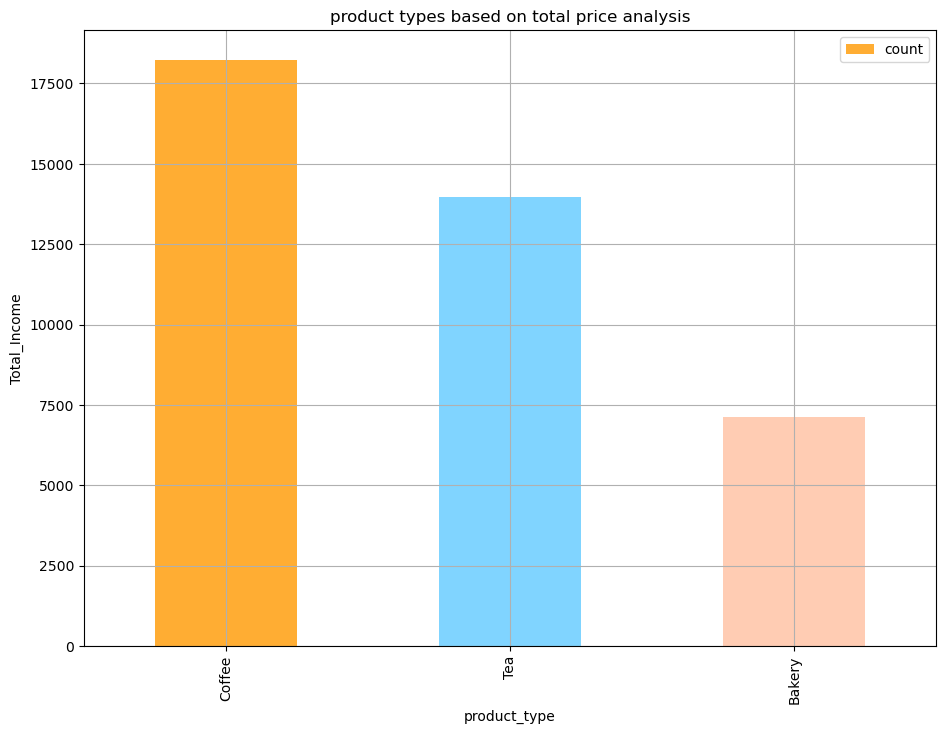

In [98]:
cafe["product_category"].value_counts().head(3).plot(kind='bar', legend=True, title="product types based on total price analysis", grid=True, xlabel='product_type', ylabel='Total_Income', figsize = (11,8), color=["#ffad33", "#80d4ff", "#ffccb3"])

15. Product types wise total price

16. Highest profitable store location

17. How to convert time am and pm and create 2 new columns am column, pm column

18. Highest Profitable product category